# So, is the climate changing?

First things first – make sure to load the climate `DataFrame` you
stored in the previous notebooks using Jupyter cell magic:

In [29]:
# Load all stored variables
%store -r

## Quantify how fast the climate is changing with a trend line

Global climate change causes different effects in different places when
we zoom in to a local area. However, you probably noticed when you
looked at mean annual temperatures over time that they were rising. We
can use a technique called **Linear Ordinary Least Squares (OLS)
Regression** to determine how quickly temperatures are rising on
average.

Before we get started, it’s important to consider that OLS regression is
not always the right technique, because it makes some important
assumptions about our data:

### Random error  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random. 

### Normally distributed error
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events). 

### Linearity
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

### Stationarity

We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?



## YOUR TASK: Is linear OLS regression right for your data?

It’s pretty rare to encounter a perfect statistical model where all the
assumptions are met, but you want to be on the lookout for serious
discrepancies, especially when making predictions. For example,
[ignoring assumptions about Gaussian error arguably led to the 2008
financial crash](https://www.wired.com/2009/02/wp-quant/).

1. Take a look at your data. In the cell below, write a few
    sentences about ways your data does and does not meet the linear OLS
    regression assumptions.

The data doesn't meet the linear OLS regression random error assumption: some of the temperature change is likely due to El Nino and La Nina years, as mentioned above. I'm not sure exactly how much of the change is due to El Nino/La Nina since Boulder isn't a coastal city, but I imagine it could be a cause of some changes. I also don't think it's fair to assume that temperatures are increasing or decreasing at a constant rate over time. I wonder if the rate of increase of temperatures could be increasing, so temperatures are rising faster, due to the increased pressure humans are putting on the environment. Even if my wondering isn't true, I still think it'd be irresponsible to say for sure that the rate of change is constant. I think that assumption could ignore a lot of details in the data. Also, there's that gap in our data from 1937 to 1942. How will the linear OLS regression account for that in terms of rate of change?

I think our data does meet the linear OLS regression assumption of normally distributed error since we're looking at average annual temperatures, not just yearly minimums or maximums.

> **Your task:**
>
> The following cell contains package imports that you will need to
> calculate and plot an OLS Linear trend line. Make sure to run the cell
> before moving on, and if you have any additional packages you would
> like to use, add them here later on.

In [30]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

> **Your task: Regression**
>
> 1.  To get sample code, ask ChatGPT how to fit a linear model to your
>     data. If you’re new to using large language modesl, go ahead and
>     check out [our
>     query](https://chatgpt.com/share/649b897b-9075-457e-8e12-308f795312a1)
> 2.  Copy code that uses the `scikit-learn` package to perform a OLS
>     linear regression to the code cell below.
> 3.  Check out your previous plot. Does it make sense to include all
>     the data when calculating a trend line? Be sure to select out data
>     that meets the OLS assumptions.

> **Note**
>
> We know that some computers, networks, and countries block LLM (large
> language model) sites, and that LLMs can sometimes perpetuate
> oppressive or offensive language and ideas. However, LLMs are
> increasingly standard tools for programming – [according to
> GitHub](https://github.com/features/copilot) many developers code 55%
> faster with LLM assistance. We also see in our classes that LLMs give
> students the ability to work on complex real-world problems earlier
> on. We feel it’s worth the trade-off, and at this point we would be
> doing you a disservice professionally to teach you to code without
> LLMs. If you can’t access them, don’t worry – we’ll present a variety
> of options for finding example code. For example, you can also search
> for an example on a site like
> [StackOverflow](https://stackoverflow.com/) (this is how we all
> learned to code, and with the right question it’s a fantastic resource
> for any coder to get access to up-to-date information from world
> experts quickly). You can also use our solutions as a starting point.

# The code cells below are to Fit an OLS Linear Regression to the data

<Axes: ylabel='Frequency'>

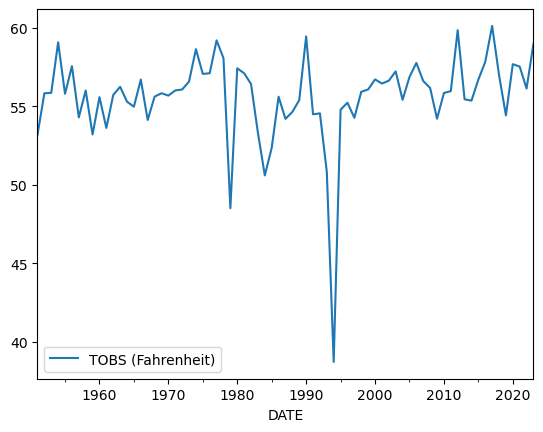

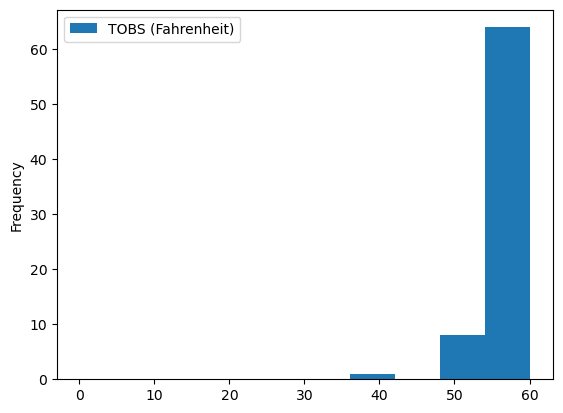

In [81]:
# Cleaning up the ann_climate_df

# Assuming ann_climate_df is your DataFrame with 'Year' as the index and 'Temperature' as the column
ann_climate_df

# Getting rid of NaN TOBS (Fahrenheit) values and start data at 1951 to skip gap (.loc, we've selected rows from 1951 to present)
ann_climate_df_clean = (
    ann_climate_df
    .loc['1951':]
    .dropna()
)

# Check to make sure NaN values got dropped and we're starting at 1951
ann_climate_df_clean.plot(y='TOBS (Fahrenheit)')

# not sure how to get my regression code to reflect these float values
# ann_climate_df_clean.index.year.values.astype(float)

# check normal distribution assumption w/ histogram. the histogram is skewed left, we think b/c of all the outliers so we are still going to assume this falls in a normal distribution
ann_climate_df_clean.plot.hist(column=['TOBS (Fahrenheit)'])

#get rid of outliers about 46 mins into the video - didn't end up doing this, do I need to?
# climate_df.resample('YS').count()

In [82]:
# Reset index
ann_climate_regr = ann_climate_df_clean.reset_index()
ann_climate_regr

,DATE,PRCP (inches),TOBS (Fahrenheit),TOBS (Celsuis)
0,1951-01-01,0.075096,53.184066,11.768926
1,1952-01-01,0.046858,55.836066,13.242259
2,1953-01-01,0.043863,55.865672,13.258706
3,1954-01-01,0.030138,59.085635,15.047575
4,1955-01-01,0.041896,55.802198,13.223443
...,...,...,...,...
68,2019-01-01,0.057644,54.426997,12.459443
69,2020-01-01,0.046721,57.691460,14.273033
70,2021-01-01,0.056658,57.538462,14.188034
71,2022-01-01,0.051479,56.139726,13.410959


In [83]:
# Reshape 'Year' column to be a 2D array for scikit-learn
X = ann_climate_regr[['DATE']].values
y = ann_climate_regr['TOBS (Fahrenheit)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 5.199080211965234e-19
Intercept: 55.3684012531983


## Plot your trend line

Trend lines are often used to help your audience understand and process
a time-series plot. In this case, we’ve chosed mean temperature values
rather than extremes, so we think OLS is an appropriate model to use to
show a trend.

> **Is it ok to plot a trend line even if OLS isn’t an appropriate
> model?**
>
> This is a tricky issue. When it comes to a trend line, choosing a
> model that is technically more appropriate may require much more
> complex code without resulting in a noticeably different trend line.
>
> We think an OLS trend line is an ok visual tool to indicate the
> approximate direction and size of a trend. If you are showing standard
> error, making predictions or inferences based on your model, or
> calculating probabilities (p-values) based on your model, or making
> statements about the statistical significance of a trend, we’d suggest
> reconsidering your choice of model.

#  Your task: Regression

1.  Add values for x (year) and y (temperature) to plot a regression
    plot. You will have to select out the year from the index values,
    just like you probably did when fitting your linear model above!
2.  Label the axes of your plot with the `title`, `xlabel`, and `ylabel`
    parameters of `ax.set()`. This function takes your plot and changes the settings. You can see how to add the degree symbol in the example
    below. Make sure your labels match what you’re plotting! :::

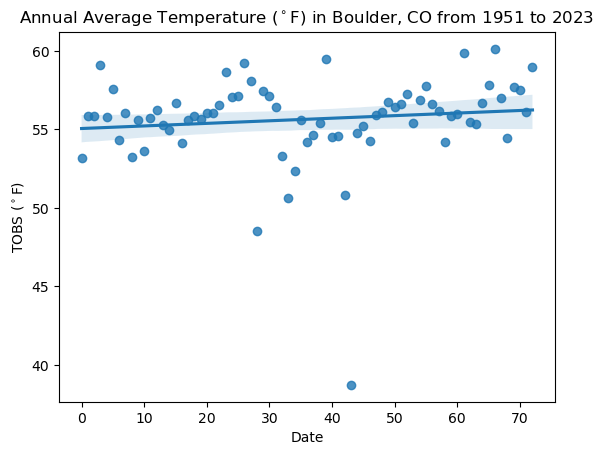

In [105]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x = ann_climate_regr.index.values, 
    y = ann_climate_regr['TOBS (Fahrenheit)'].values,
    )
# Set plot labels
ax.set(
    title = 'Annual Average Temperature ($^\circ$F) in Boulder, CO from 1951 to 2023',
    xlabel = 'Date',
    ylabel = 'TOBS ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Interpret the trend</div></div><div class="callout-body-container callout-body"><ol type="1">
<li><p>Create a new Markdown cell below this one.</p></li>
<li><p>Write a plot headline. Your headline should
<strong>interpret</strong> your plot, unlike a caption which neutrally
describes the image.</p></li>
<li><p>Is the climate changing? How much? Report the slope of your trend
line.</p></li>
</ol></div></div>

# Plot Headline:
## Over the last 73 years, temperatures have risen in Boulder, CO.

### Boulder's climate is changing in many ways, although this plot specifically shows the change in temperature. My slope is 5.2 x 10^-19^ ($^\circ$F) per year. While this is a small increase, it is still an increase.
